# Lab 2 : image restoration, image compression

In this lab, you will apply some standard filters to locally detect features. You will then see two important problems in image processing : restoration and compression.

This lab session is graded, here are the guidelines
- Work alone or by pair
- Upload you notebook on LMS, save the entries
- Deadline: Sept 28th

## 1. Image denoising

Image denoising is an ubiquitous task in image processing, because image acquisition is always disturbed by random perurbations called **noise**. There are many kinds of noise, see for instance [this introduction on Wikipedia](https://en.wikipedia.org/wiki/Image_noise). 

We will here consider successfully :
- salt and pepper noise, which models defects in some sensor cells,
- Gaussian noise, which is the most common model,
- and Poisson-Gaussian noise, which is more realistic for many imaging modalities, including satellite imagery

### Salt-and-pepper noise
Execute the following cell which simulates such impulsive noise, and remove it with median filtering. To evaluate the quality of the denoising, we will use two common metrics: PSNR and SSIM. 


PSNR in: 22.39138681201809  SSIM in: 0.6066633287487552
PSNR out: 33.85439437886098  SSIM out: 0.933084840829144


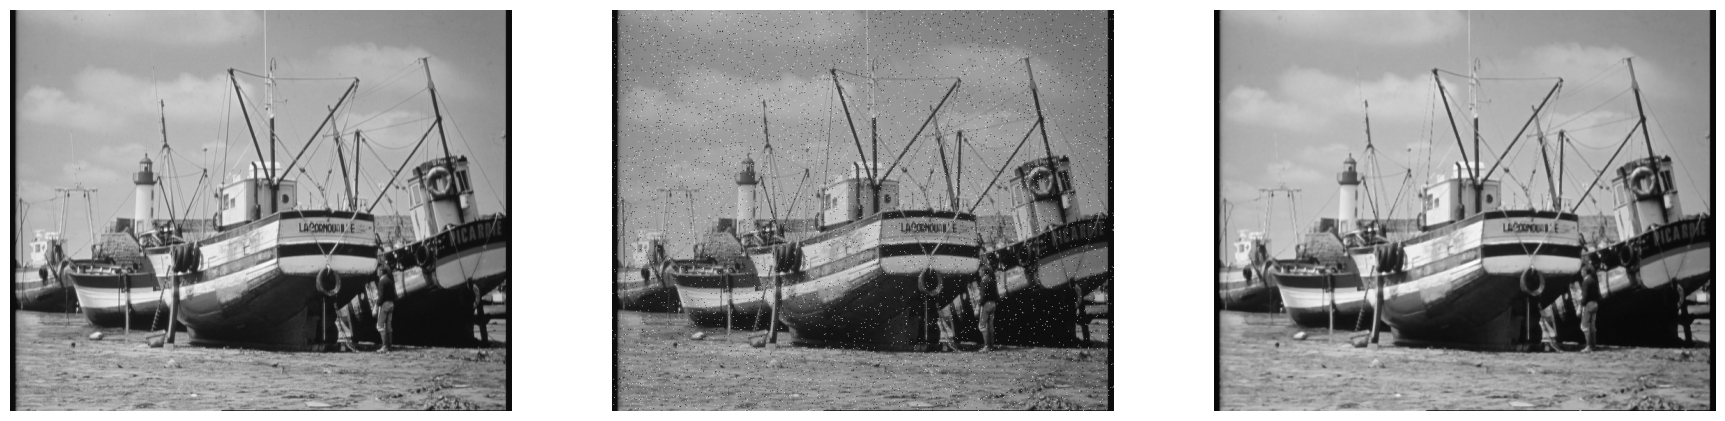

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io as io
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.filters import median

#hgrhfgdhtdhrftdhrs

# Read the image
img = io.imread( 'boats.bmp' )
len = np.size(img)

# Simulate salt and pepper noise
p = 0.01 # percentage of each
_idx = np.random.sample(img.shape) #uniform rand

img_noisy = img
# salt
img_noisy = np.where(_idx > 1.-p, 255, img)
# pepper pixels
img_noisy = np.where(_idx < p, 0, img_noisy)


# Apply median filtering
img_denoised = median(img_noisy, np.ones((3, 3)))

# Display
fig, axes = plt.subplots(ncols=3, figsize=(22,8))
axes[0].imshow(np.uint8(img), cmap=plt.get_cmap('gray'))
axes[1].imshow(np.uint8(img_noisy), cmap=plt.get_cmap('gray'))
axes[2].imshow(np.uint8(img_denoised), cmap=plt.get_cmap('gray'))

# Turn off axes for all subplots
p = [axi.set_axis_off() for axi in axes.ravel()]

# Get metrics
print('PSNR in: ' + str(psnr(img,img_noisy)) + '  SSIM in: ' +  str(ssim(img,img_noisy)))
print('PSNR out: ' + str(psnr(img,img_denoised)) + '  SSIM out: ' + str(ssim(img,img_denoised)))

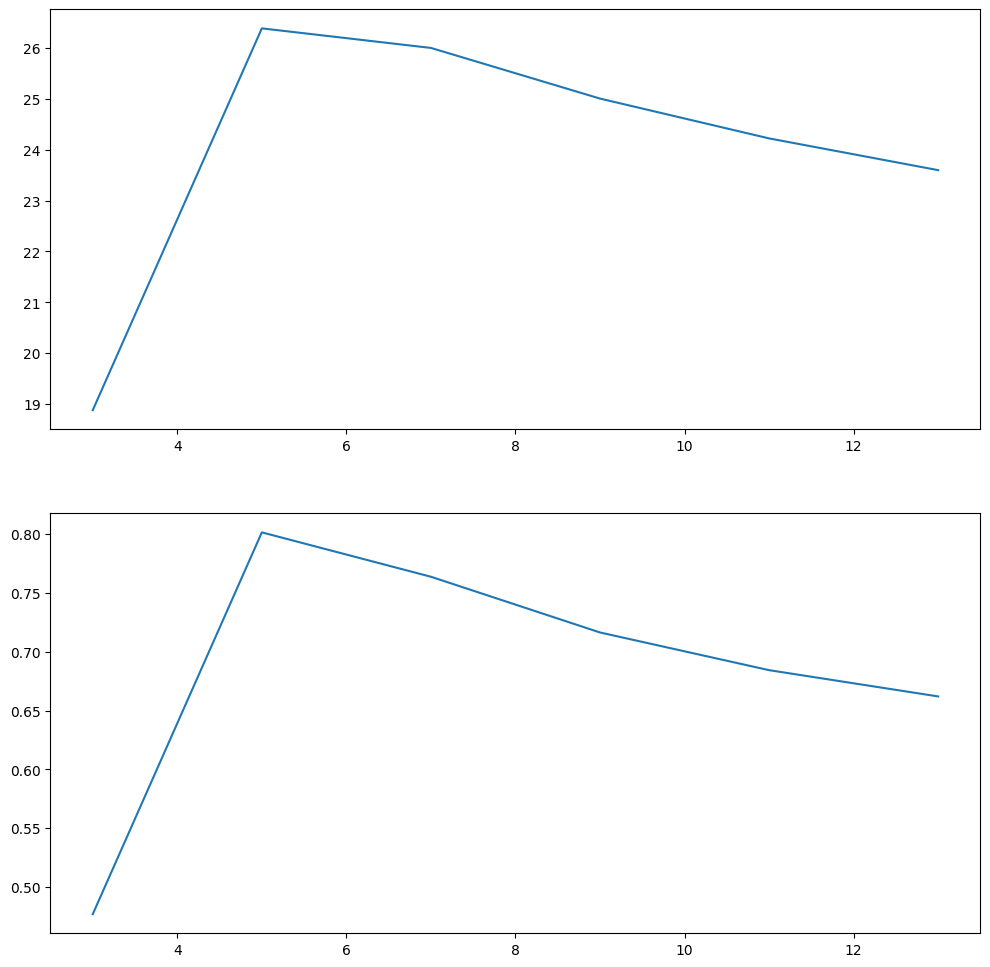

In [27]:
img = io.imread( 'boats.bmp' )
# Simulate salt and pepper noise
p = 0.2 # percentage of each
_idx = np.random.sample(img.shape) #uniform rand

img_noisy = img
# salt
img_noisy = np.where(_idx > 1.-p, 255, img)
# pepper pixels
img_noisy = np.where(_idx < p, 0, img_noisy)

kernel_size = [i for i in range(3,15,2)]
psn = []
sim_2 = []

for i in kernel_size:
    img_denoised = median(img_noisy, np.ones((i, i)))
    psn.append(psnr(img,img_denoised))
    sim_2.append(ssim(img,img_denoised))


fig, ax = plt.subplots(nrows=2,ncols=1,figsize = (12,12))
ax[0].plot(kernel_size,psn)
ax[1].plot(kernel_size,sim_2)



<span style='color:red'><b>Exercise 1:</b></span> what is the optimal width of the filter, for a given value of p? Plot the PSNR and SSIM as a function of this width, conclude.

### Gaussian noise

We will now consider white Gaussian noise, a model commonly used in image processing. Be careful, we now need to work with floats !

The noisy image can be written $y=x+n$, with $n\sim\mathcal{N}(0,\sigma^2)$.

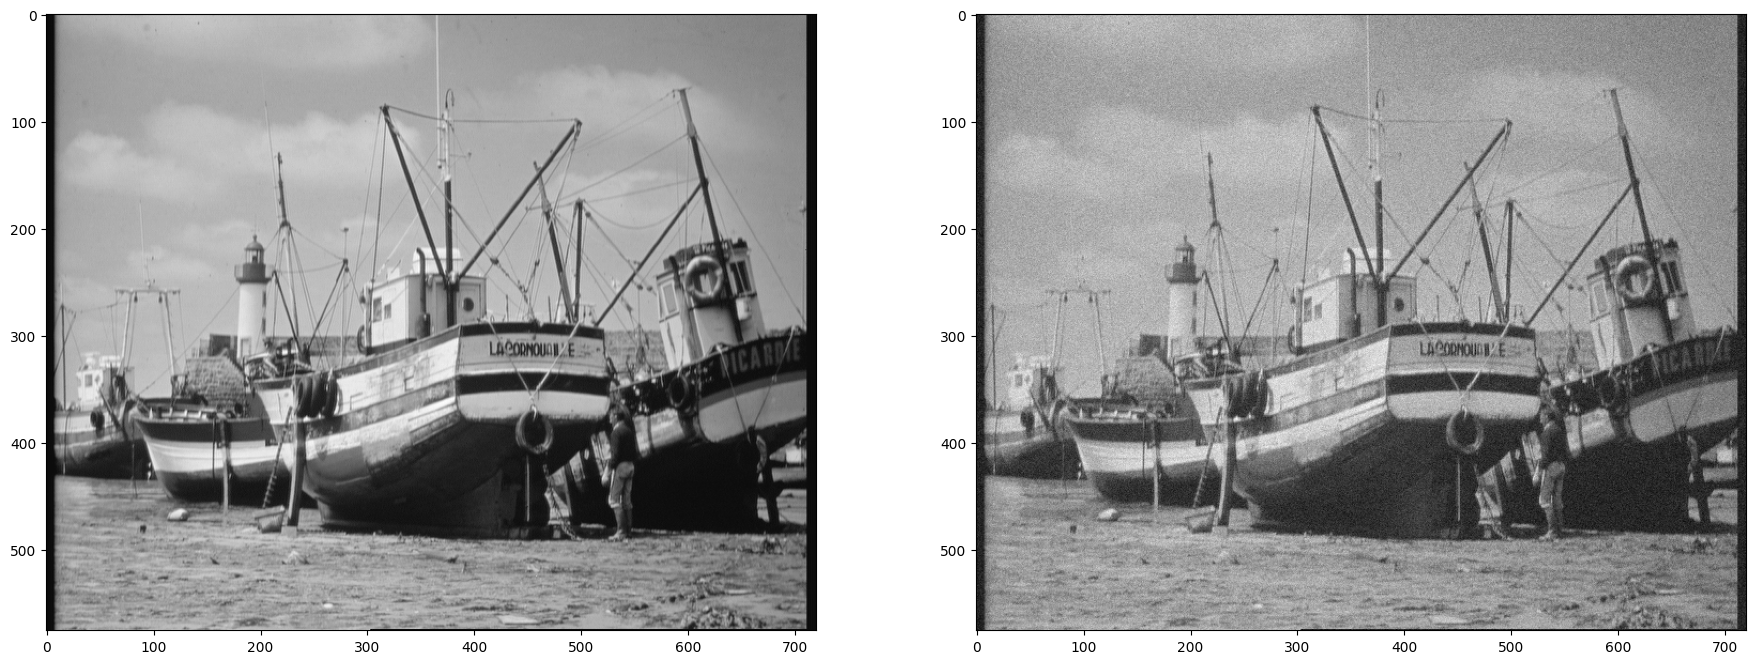

In [ ]:
# Read the image
img = io.imread( 'boats.bmp' )
img = img * 1.
sigma = 10.
img_noisy = img + sigma * np.random.randn(*img.shape)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(22,8))

axes[0].imshow(img, cmap=plt.get_cmap('gray'))
axes[1].imshow(img_noisy, cmap=plt.get_cmap('gray'))




<span style='color:red'><b>Exercise 2:</b></span> 
- Try median filtering, then low-pass filtering. Are those techniques efficient?
- Try [bilateral filtering](https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_bilateral), why does it work better?
- Try [non-local means](https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_nl_means), why is the denoising still improved?

Text(0.5, 1.0, 'Image bruit')

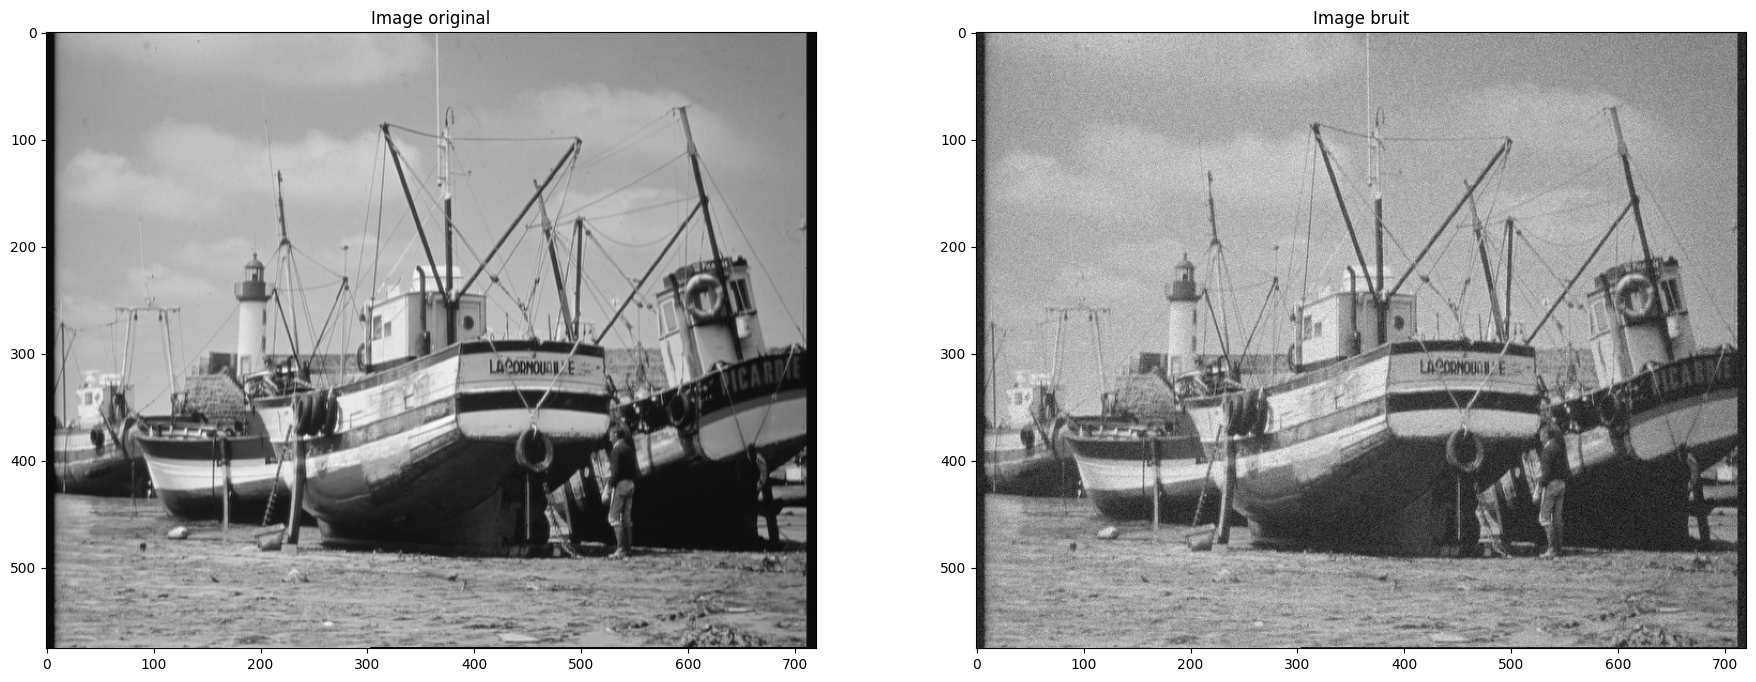

In [62]:
from scipy import signal
from skimage import restoration



img = io.imread( 'boats.bmp' )
img = img * 1.
sigma = 10.
img_noisy = img + sigma * np.random.randn(*img.shape)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(22,8))

axes[0].imshow(img, cmap=plt.get_cmap('gray'))
axes[0].set_title("Image original")

axes[1].imshow(img_noisy, cmap=plt.get_cmap('gray'))
axes[1].set_title("Image bruit")



[[16.60109394  6.58421583 26.79322987 ...  6.60104171 23.95638887
  17.02769597]
 [ 8.29191003 14.02116627 21.4624003  ... 24.45817797 10.48624771
  14.54897958]
 [25.33751946 12.13427458 12.1578545  ... 11.76559669 16.15778337
  20.83449459]
 ...
 [ 4.45479703 20.78491449 -5.83487824 ... -7.21789469  8.64562784
  11.30090095]
 [25.60858245 23.95380185 13.97797465 ... 11.96136563 11.51137754
  16.92131336]
 [ 7.20957382  9.90674116 -4.34937167 ... 26.04791359 20.85226535
   5.82753173]]
filtre median: PSNR out: 31.196132120145407  SSIM out: 0.8241967568992107
filtre low pass: PSNR out: 30.759928727681334  SSIM out: 0.8488715916932829
filtre bil: PSNR out: 23.2290765833702  SSIM out: 0.6032241394192323


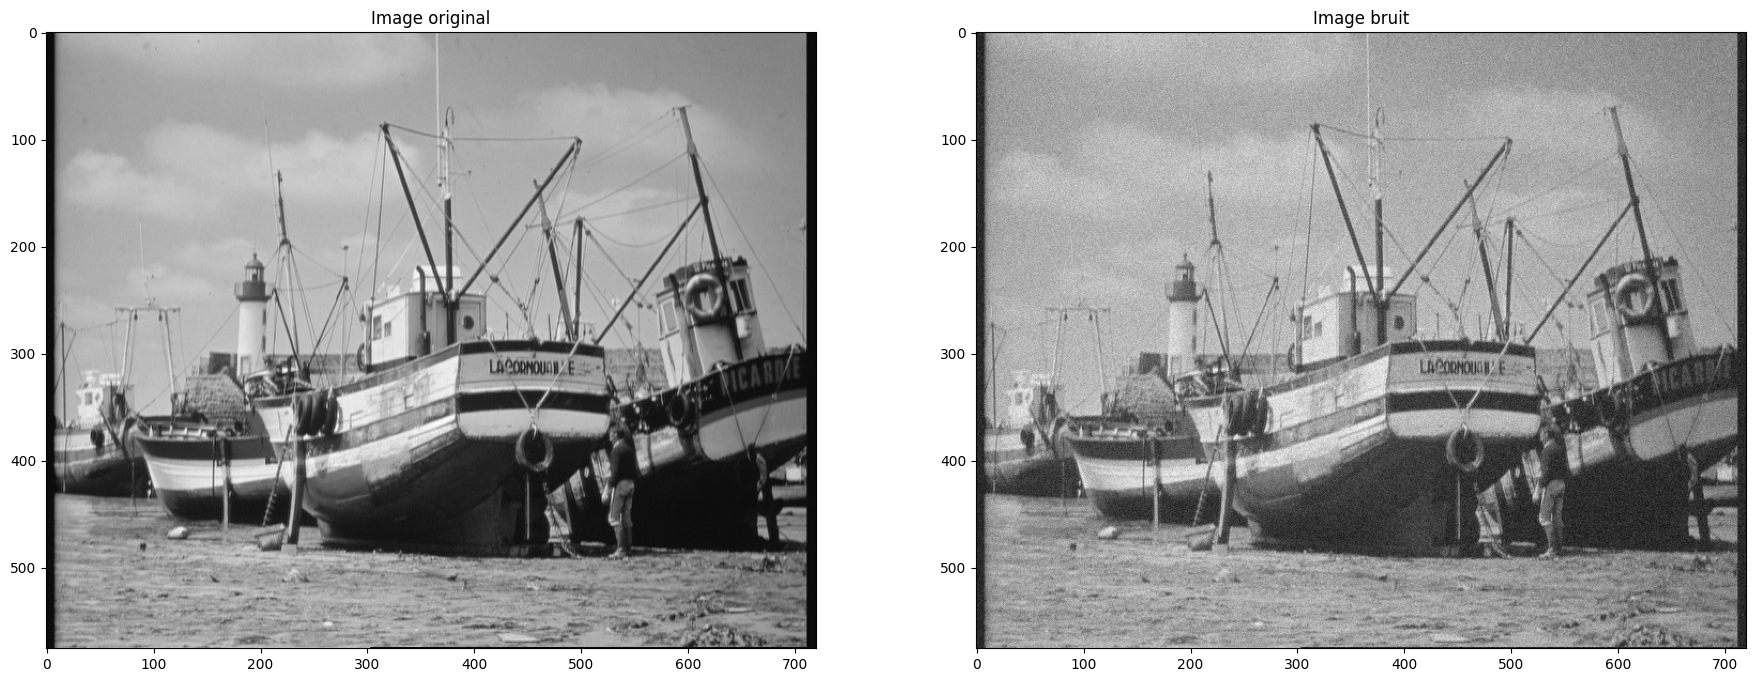

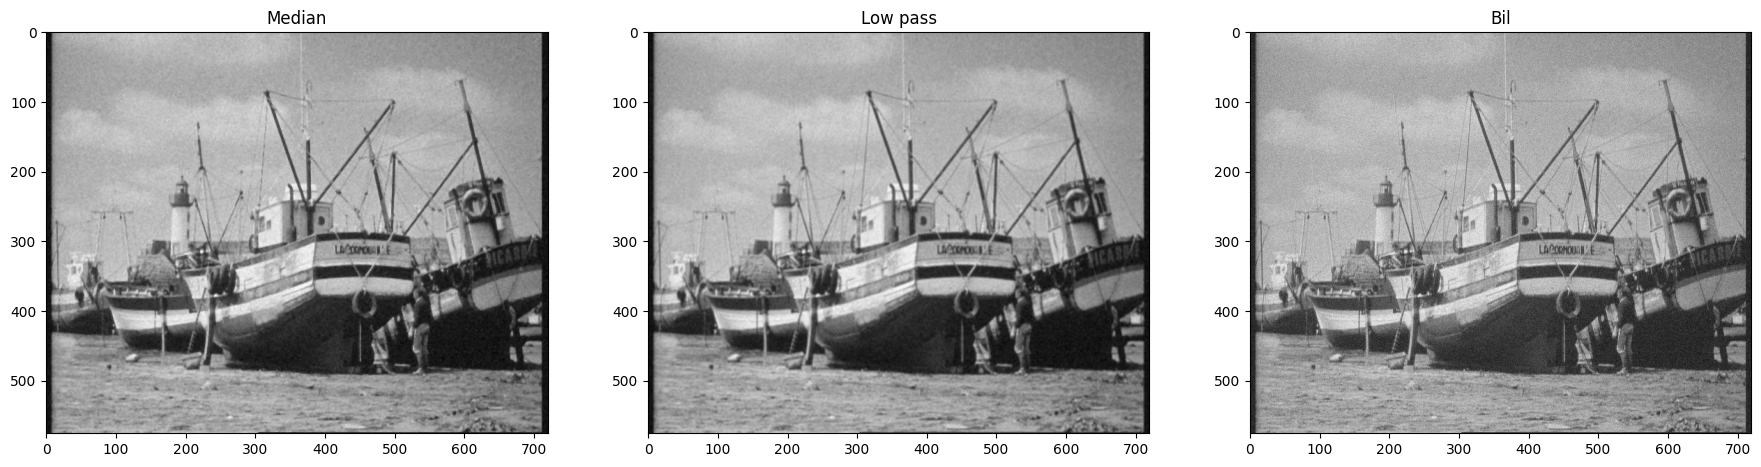

In [90]:


img = io.imread( 'boats.bmp' )
img = img * 1.
sigma = 10.
img_noisy = img + sigma * np.random.randn(*img.shape)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(22,8))

axes[0].imshow(img, cmap=plt.get_cmap('gray'))
axes[0].set_title("Image original")

axes[1].imshow(img_noisy, cmap=plt.get_cmap('gray'))
axes[1].set_title("Image bruit")

img_denoised_med = median(img_noisy, np.ones((3, 3)))

kernel = np.ones((3,3))/9
img_denoised_lp = signal.convolve2d(img_noisy,kernel,boundary='symm',mode="same")

img_denoised_bil = restoration.denoise_bilateral(img_noisy,sigma_color=0.1,sigma_spatial=1)
print(img_denoised_bil)

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(22,8))

axes[0].imshow(img_denoised_med, cmap=plt.get_cmap('gray'))
axes[0].set_title("Median")
axes[1].imshow(img_denoised_lp, cmap=plt.get_cmap('gray'))
axes[1].set_title("Low pass")
axes[2].imshow(img_denoised_bil, cmap=plt.get_cmap('gray'))
axes[2].set_title("Bil")


# img = np.uint8(img*255)
# img_denoised_lp = np.uint8(img_denoised_lp*255)
# img_denoised_med = np.uint8(img_denoised_med*255)
# img_denoised_bil = np.uint8(img_denoised_bil*255)

img = np.uint8(img)
img_denoised_lp = np.uint8(img_denoised_lp)
img_denoised_med = np.uint8(img_denoised_med)
img_denoised_bil = np.uint8(img_denoised_bil)



print('filtre median: PSNR out: ' + str(psnr(img,img_denoised_med)) + '  SSIM out: ' +  str(ssim(img,img_denoised_med)))
print('filtre low pass: PSNR out: ' + str(psnr(img,img_denoised_lp)) + '  SSIM out: ' + str(ssim(img,img_denoised_lp)))
print('filtre bil: PSNR out: ' + str(psnr(img,img_denoised_bil)) + '  SSIM out: ' + str(ssim(img,img_denoised_bil)))






In [91]:


img = io.imread( 'boats.bmp' )
img = img * 1.
sigma = 10.
img_noisy = img + sigma * np.random.randn(*img.shape)



sigma_l = np.linspace(0.1,10,100)
psnr_i = []
ssim_i = []
for i in sigma_l:
    img_denoised_bil = restoration.denoise_bilateral(img_noisy,sigma_color=i,sigma_spatial=1)
    print(img_denoised_bil)
    psnr_i.append(psnr(img,img_denoised_bil))
    ssim_i.append(ssim(img,img_denoised_bil))

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(22,8))
axes[0].plot(sigma_l,psnr_i)
axes[1].plot(sigma_l,ssim_i)





# img = np.uint8(img*255)
# img_denoised_lp = np.uint8(img_denoised_lp*255)
# img_denoised_med = np.uint8(img_denoised_med*255)
# img_denoised_bil = np.uint8(img_denoised_bil*255)

img = np.uint8(img)
img_denoised_bil = np.uint8(img_denoised_bil)


print('filtre bil: PSNR out: ' + str(psnr(img,img_denoised_bil)) + '  SSIM out: ' + str(ssim(img,img_denoised_bil)))






[[ 1.41400847 23.6331849  12.20060379 ... 10.03918683  9.86906917
  19.32673222]
 [ 0.66037659 10.65803826 10.93523514 ... 27.36630173  4.85070902
  14.20294155]
 [34.83470288 13.68974518 13.66315418 ... 10.56179762 15.62832814
  26.01496924]
 ...
 [ 7.21220684 19.38795486 -5.21874543 ... 14.25799967 18.82182134
  18.82386051]
 [ 5.90235432 29.61477213 24.27573032 ... 17.99980535 25.93752113
   7.49564469]
 [20.35091694  5.87475711 31.42742801 ... 10.57408949 25.87140828
   9.79268185]]


ValueError: image_true has intensity values outside the range expected for its data type. Please manually specify the data_range.

In [ ]:

kernel = np.ones((3,3))/9
img_denoised_lp = signal.convolve2d(img_noisy,kernel,boundary='symm',mode="same")

img_denoised_bil = restoration.denoise_bilateral(img_noisy,sigma_color=0.1,sigma_spatial=1)

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(22,8))

axes[0].imshow(img_denoised_med, cmap=plt.get_cmap('gray'))
axes[0].set_title("Median")
axes[1].imshow(img_denoised_lp, cmap=plt.get_cmap('gray'))
axes[1].set_title("Low pass")
axes[2].imshow(img_denoised_bil, cmap=plt.get_cmap('gray'))
axes[2].set_title("Bil")


img = np.uint8(img*255)
img_denoised_lp = np.uint8(img_denoised_lp*255)
img_denoised_bil = np.uint8(img_denoised_bil*255)




print('filtre low pass: PSNR out: ' + str(psnr(img,img_denoised_lp)) + '  SSIM out: ' + str(ssim(img,img_denoised_lp)))
print('filtre bil: PSNR out: ' + str(psnr(img,img_denoised_bil)) + '  SSIM out: ' + str(ssim(img,img_denoised_bil)))






In [ ]:
nel = np.ones((3,3))/9
img_denoised_lp = signal.convolve2d(img_noisy,kernel,boundary='symm',mode="same")

img_denoised_bil = restoration.denoise_bilateral(img_noisy,sigma_color=0.1,sigma_spatial=1)

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(22,8))

axes[0].imshow(img_denoised_med, cmap=plt.get_cmap('gray'))
axes[0].set_title("Median")
axes[1].imshow(img_denoised_lp, cmap=plt.get_cmap('gray'))
axes[1].set_title("Low pass")
axes[2].imshow(img_denoised_bil, cmap=plt.get_cmap('gray'))
axes[2].set_title("Bil")


img = np.uint8(img*255)
img_denoised_lp = np.uint8(img_denoised_lp*255)
img_denoised_med = np.uint8(img_denoised_med*255)
img_denoised_bil = np.uint8(img_denoised_bil*255)




print('filtre median: PSNR out: ' + str(psnr(img,img_denoised_med)) + '  SSIM out: ' +  str(ssim(img,img_denoised_med)))
print('filtre low pass: PSNR out: ' + str(psnr(img,img_denoised_lp)) + '  SSIM out: ' + str(ssim(img,img_denoised_lp)))
print('filtre bil: PSNR out: ' + str(psnr(img,img_denoised_bil)) + '  SSIM out: ' + str(ssim(img,img_denoised_bil)))






### Poisson-Gaussian noise (bonus)

A more realistic assumption accounts for Poisson noise, which is always present in images. The Poisson-Gaussian noise affecting a pixel $x$ can be written
$$ y \sim \gamma^{-1}\mathcal{P}(\gamma x) + \mathcal{N}(0,\sigma^2).$$

<span style='color:red'><b>Exercise 2 bis (bonus):</b></span> 
- Is this noise still additive?
- What is the variance of $y$?
- Explain why we can approximate this model by
$$y \sim x + \mathcal{N}(0,\sigma^2 + \gamma x).$$
- Simulate such a noise and apply NL-means. What can you observe on the estimated noise $\hat b$?

## 2. Image approximation and compression

We will now move to approximation and compression of images. We will apply some linear transforms such as DCT (discrete cosine transform) or DWT (discrete wavelet transform), and evaluate their performance in terms of image approximation.

Let us start by defining the DCT transform, its inverse and their block counterparts. We will then compute and display DCT and block-DCT on image *Barbara*. Since most of the energy is contained in the low frequencies, we will use a logarithmic display.

In [1]:
import scipy
import scipy.fftpack
from numpy import r_

# Define dct, idct, and block transforms
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

def block_dct2(im):
    imsize = im.shape
    dct = np.zeros(imsize)

    # Do 8x8 DCT on image (in-place)
    for i in r_[:imsize[0]:8]:
        for j in r_[:imsize[1]:8]:
            dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )
    return dct

def block_idct2(dct):
    imsize = dct.shape
    im = np.zeros(imsize)

    # Do 8x8 iDCT on image (in-place)
    for i in r_[:imsize[0]:8]:
        for j in r_[:imsize[1]:8]:
            im[i:(i+8),j:(j+8)] = idct2( dct[i:(i+8),j:(j+8)] )
    return im


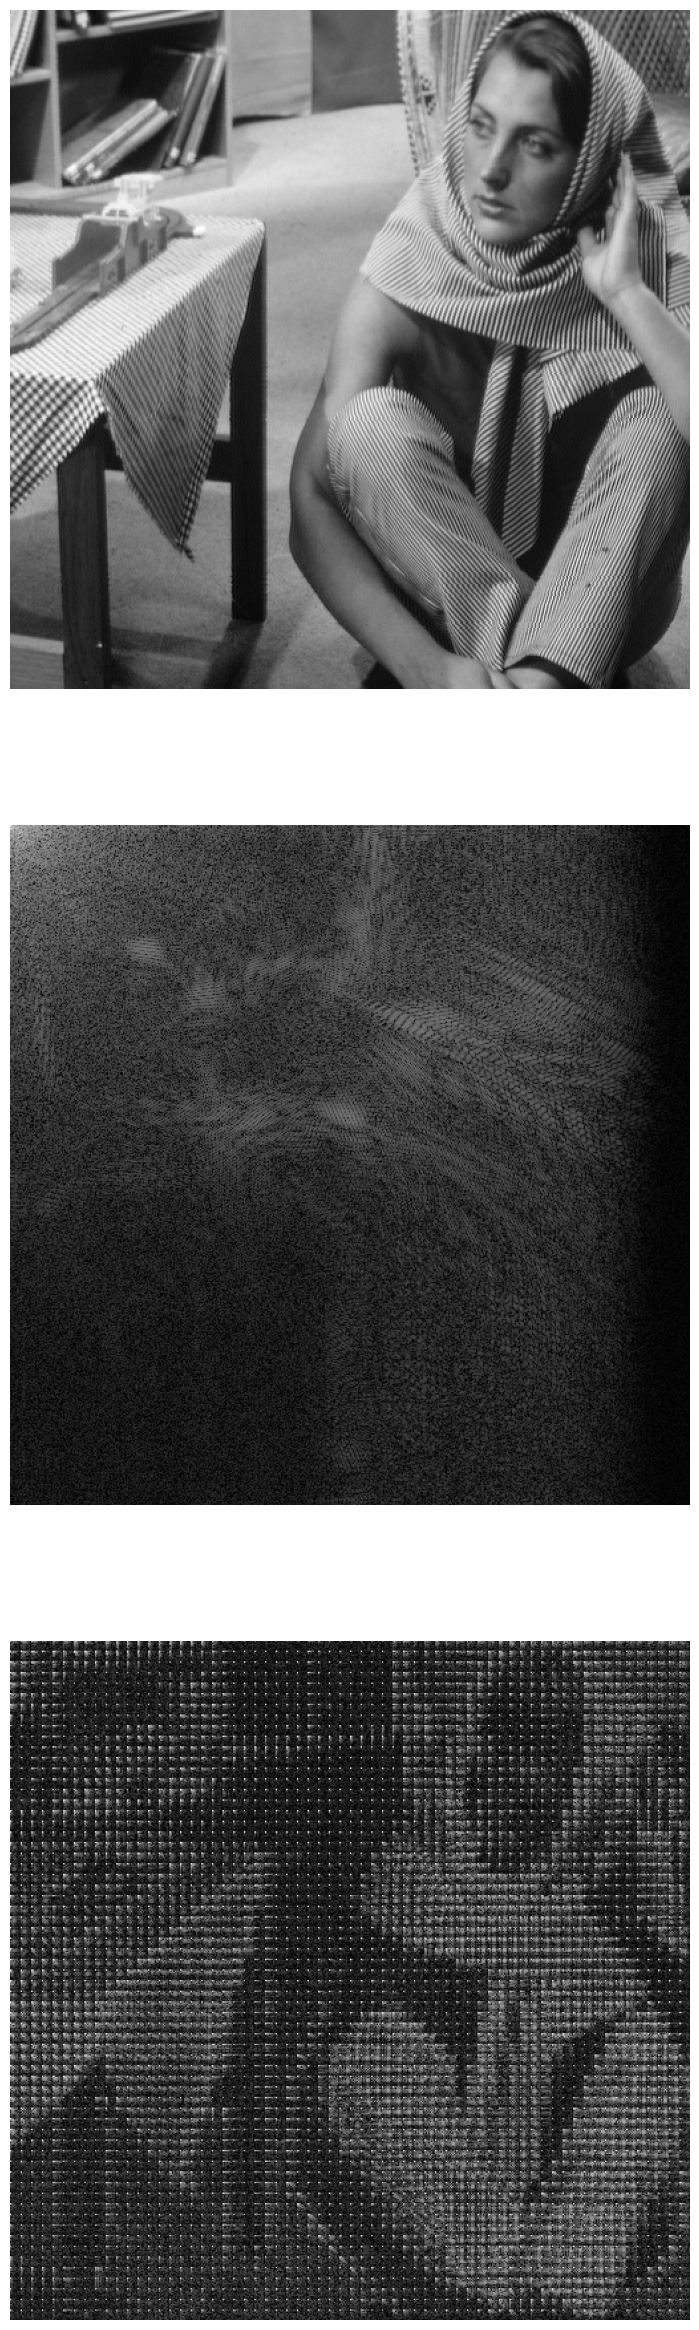

In [19]:
# Read the image
img = io.imread( 'barbara.pgm' )

# Compute DCT and block DCT
dct = dct2(img)
# img = idct2(dct)
bdct = block_dct2(img)

# Display image and transforms
fig, axes = plt.subplots(nrows=3, figsize=(10,30))
axes[0].imshow(np.uint8(img), cmap=plt.get_cmap('gray'))
axes[1].imshow(np.log(1+np.abs(dct)), cmap=plt.get_cmap('gray'))
axes[2].imshow(np.log(1+np.abs(bdct)), cmap=plt.get_cmap('gray'))

# Turn off axes for all subplots
p = [axi.set_axis_off() for axi in axes.ravel()]

The goal now is to approximate the image with few coefficients. To compare the different transformations, we will threshold the smallest coefficients, and see how this impacts the reconstruction of the image.

<span style='color:red'><b>Exercise 3:</b></span> 
- Set the the half smallest coefficients (in magnitude) to 0 for both transforms. Invert them, show the result and compute the PSNR and SSIM. You might use **np.median**.
- Do the same for other approximation rates (keep only 10% of the coefficients, then 20, 30, etc). You can use **np.quantile**. Show the usual metrics (PSNR and SSIM) as a function of the rate. Compare DCT and block DCT, and comment.
- (bonus) Do the same for a discrete wavelet transform.

compression 1: PSNR: 22.79991612295602  SSIM: 0.5505781831492619
compression 2: PSNR: 14.892092371977766  SSIM: 0.2911266438463274


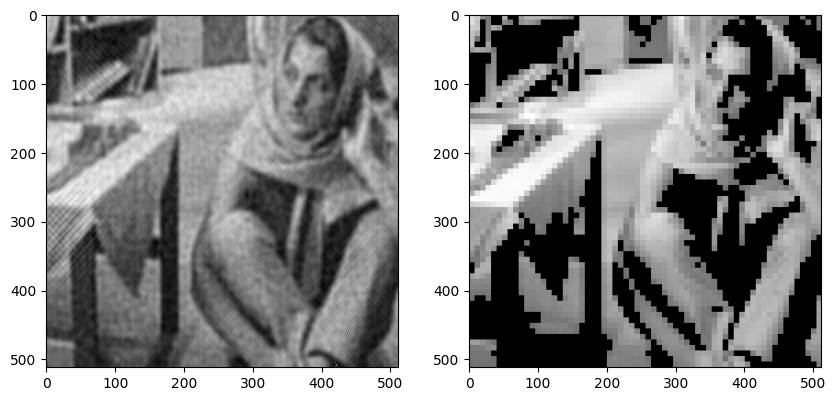

In [ ]:
img = io.imread( 'barbara.pgm' )

# Compute DCT and block DCT
dct = dct2(img)
# img = idct2(dct)
bdct = block_dct2(img)

q = 0.9

# Image 1
selec = np.where(np.abs(dct)<np.quantile(np.abs(dct),q))
dct[selec] = 0
img_r = idct2(dct)
img = np.uint8(img)
img_r = np.uint8(img_r)


imsize = img.shape
ibdct = np.zeros(imsize)
selec = np.where(np.abs(bdct)<np.quantile(np.abs(bdct),q))
bdct[selec] = 0
# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        k=bdct[i:(i+8),j:(j+8)]
        ibdct[i:(i+8),j:(j+8)] = idct2(k)


img_r2 = np.uint8(ibdct)


print('compression 1: PSNR: ' + str(psnr(img,img_r)) + '  SSIM: ' +  str(ssim(img,img_r)))
print('compression 2: PSNR: ' + str(psnr(img,img_r2)) + '  SSIM: ' +  str(ssim(img,img_r2)))

fig, axes = plt.subplots(ncols=2, figsize=(10,10))

axes[0].imshow(img_r,cmap=plt.get_cmap('gray'))
axes[1].imshow(img_r2,cmap=plt.get_cmap('gray'))

The goal now is to understand the  link with image compression. Recall than in compression by transformation, a transform is first applied to the image, and the coefficients are then quantized and losslessly coded. The more "concentrate" the image coefficients, the better the result.

<span style='color:red'><b>Exercise 4:</b></span> 
- Display a small sample of a JPEG image, such as the provided *flower.jpg*
- Show some blocks that appear because of the JPEG compression
- Where is the quantization the most problematic?

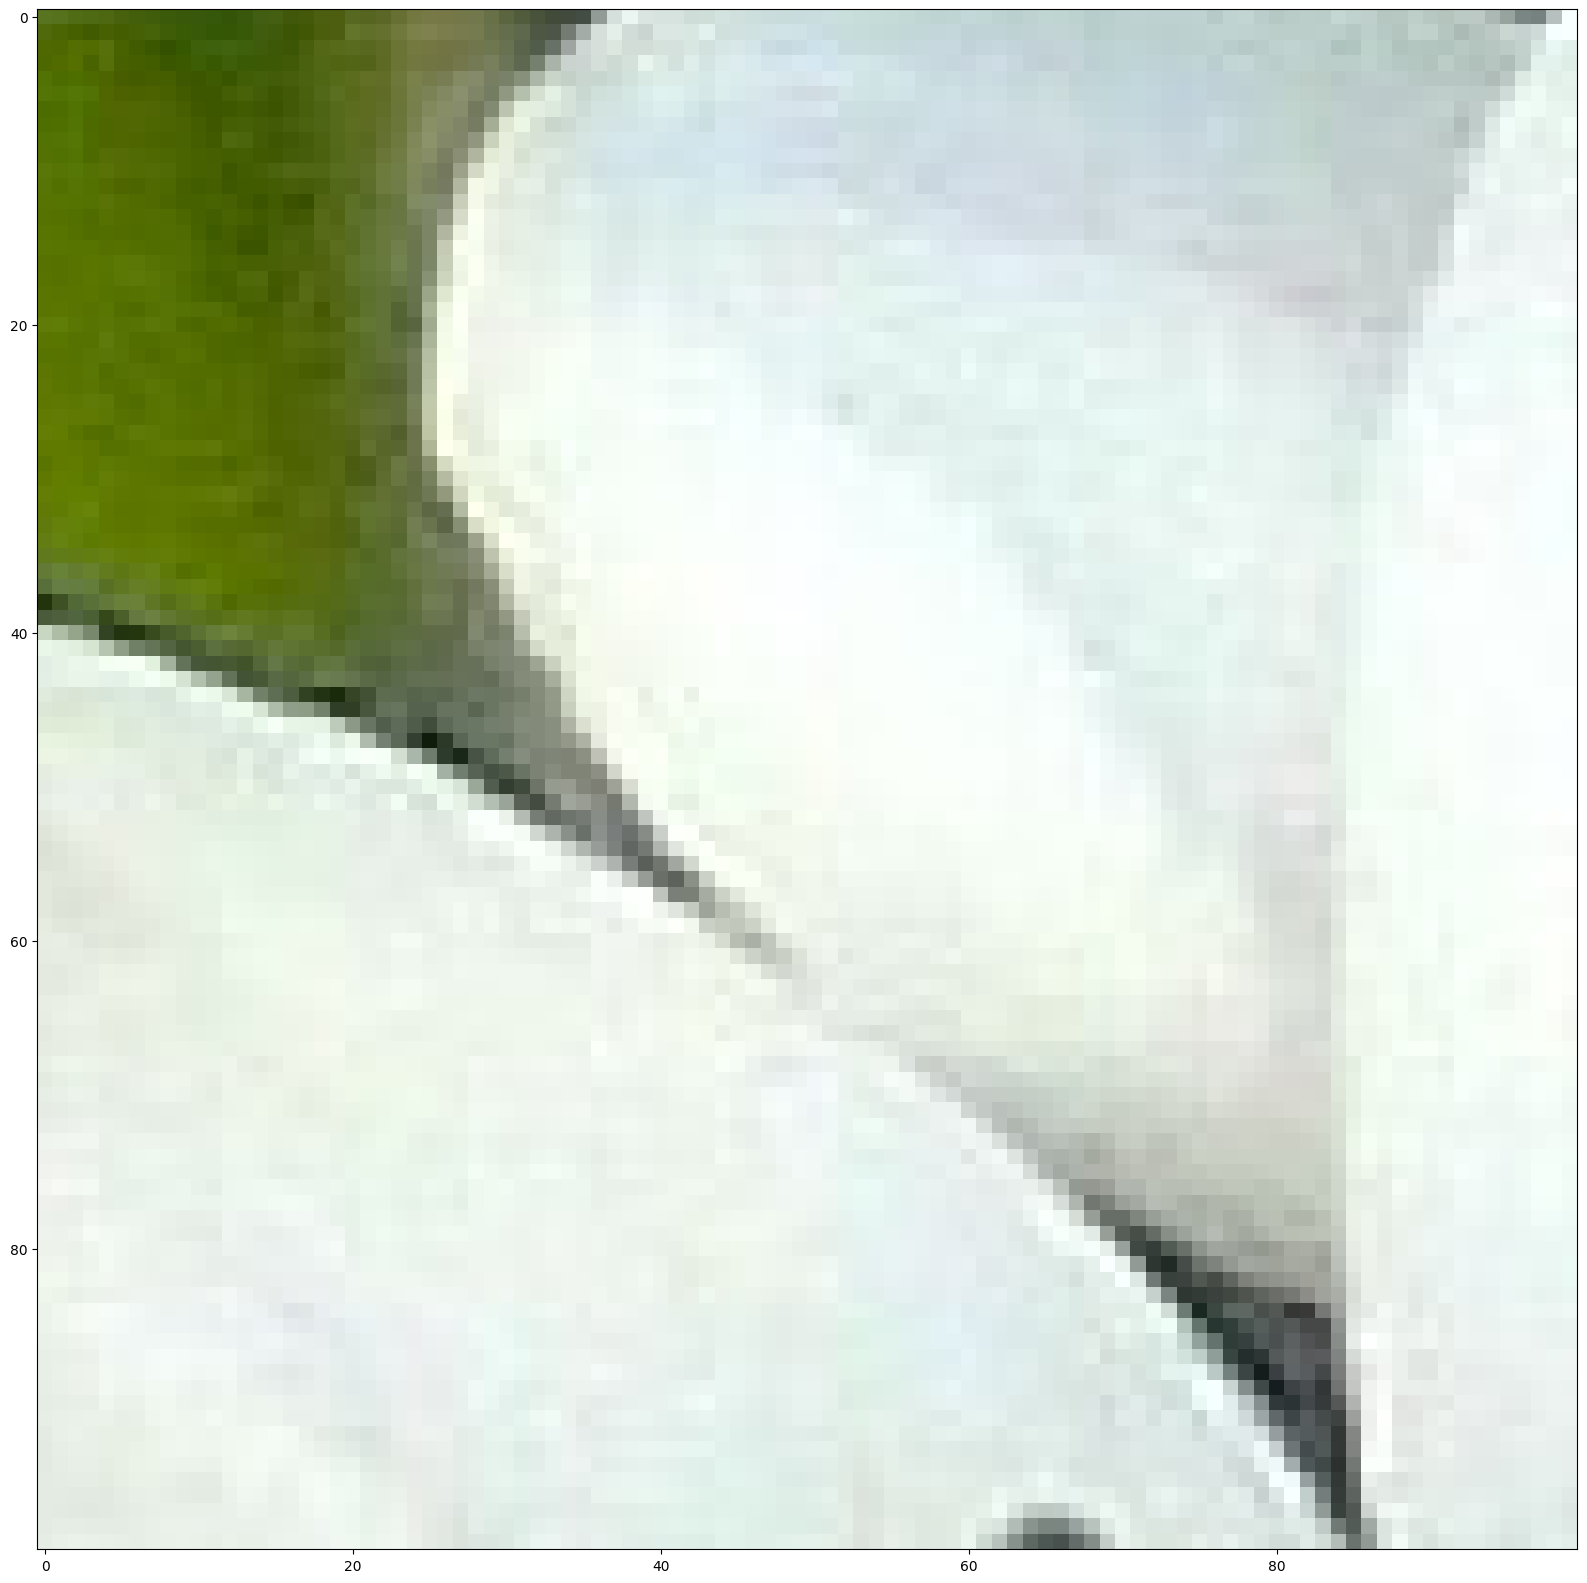

In [ ]:
img = io.imread( 'flower.jpg' )
x = 0
y = 0
dx = 100
dy = 100
fig, axes = plt.subplots(ncols=1, figsize=(20,20))
axes.imshow(img[x:x+dx,y:y+dy,:])